In [84]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

pio.templates.default = "plotly_white"

# Friedmann plot

In [6]:
df = pd.read_csv("../../data/ESOL/manual_vs_attribution_rank_correlations.csv")
df.head()

,Unnamed: 0,smiles,prediction,ESOL,absolute_error,absolute_error_class,SME_rank_corr,Shapley_rank_corr,HN_rank_corr
0,0,BrCCBr,-1.659495,-1.68,0.020505,< 0.6,1.0,1.0,1.0
1,3,Brc1cc(Br)c(Br)cc1Br,-6.510058,-6.98,0.469942,< 0.6,1.0,1.0,1.0
2,8,Brc1cccc(Br)c1,-4.152843,-3.54,0.612843,>= 0.6,1.0,1.0,1.0
3,11,Brc1cccc2ccccc12,-4.388748,-4.35,0.038748,< 0.6,1.0,1.0,1.0
4,13,C#CCCCCCCC,-4.244354,-4.24,0.004354,< 0.6,1.0,1.0,1.0


In [31]:
df_long = df.melt(
    id_vars=["smiles", "prediction", "ESOL", "absolute_error_class"], 
    value_vars=["SME_rank_corr", "Shapley_rank_corr", "HN_rank_corr"],
    value_name="corr",
    var_name="attribution_method"
)

df_long["attribution_method"] = df_long.attribution_method.str.split("_", expand=True)[0]
df_long.head()

,smiles,prediction,ESOL,absolute_error_class,attribution_method,corr
0,BrCCBr,-1.659495,-1.68,< 0.6,SME,1.0
1,Brc1cc(Br)c(Br)cc1Br,-6.510058,-6.98,< 0.6,SME,1.0
2,Brc1cccc(Br)c1,-4.152843,-3.54,>= 0.6,SME,1.0
3,Brc1cccc2ccccc12,-4.388748,-4.35,< 0.6,SME,1.0
4,C#CCCCCCCC,-4.244354,-4.24,< 0.6,SME,1.0


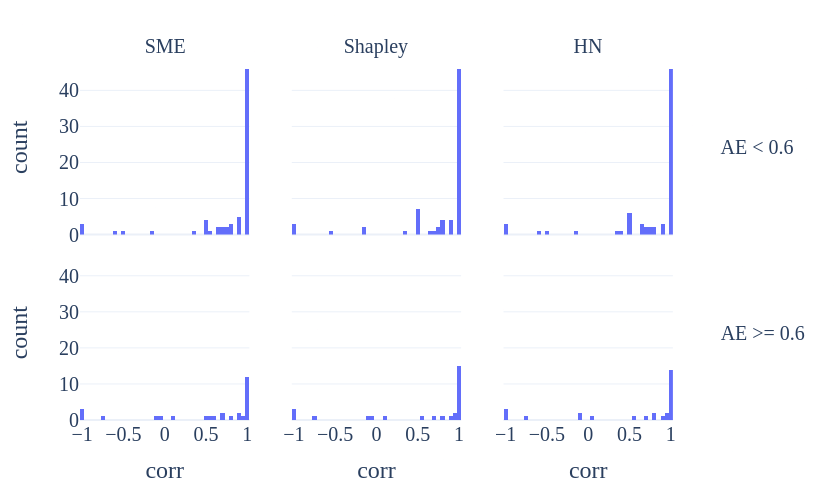

In [60]:
def annotate(a):

    if a.text.split("=")[-1] in df_long.attribution_method.unique():
        return a.update(text=a.text.split("=")[-1])
    
    if a.text.split("=", 1)[-1] in df_long.absolute_error_class.unique(): 
        return a.update(text=f"\t AE {a.text.split('=', 1)[-1]}", textangle=0)

    return  a.update(text=a.text.split("=")[-1])

fig = px.histogram(
    df_long, 
    x="corr", 
    facet_row="absolute_error_class", 
    facet_col="attribution_method",
    nbins=100,
    facet_col_spacing=0.07
)

fig.update_layout(
    autosize=False, 
    width=800, 
    height=500,
    font=dict(
        family="times new roman",
        size=20
    ),
    margin={"r": 150},
)
fig.for_each_annotation(annotate)
fig.show()

# Other

In [73]:
df = pd.read_json("../../data/ESOL/attribution_around_mean.json").rename(
    columns={"functional_group_smarts": "substruct_smiles", "difference": "SME", "time_difference": "time_SME"}
)
df.head()

,molecule_smiles,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value
0,O=C(Nc1ccccc1)Nc1ccccc1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",scaffold,-0.016130,-3.289866,-3.305996,0.507586,-0.178886,0.019148,-0.178886,0.018450
1,CC,"[0, 1]",scaffold,-0.016130,-1.215026,-1.231156,0.586246,1.895954,0.016790,1.895954,0.016012
2,C=C(Br)CC1(C(C)CC)C(=O)NC(=O)NC1=O,[2],"[F,Cl,Br,I]",-2.427787,-0.230768,-2.658555,0.514224,1.127742,0.033316,1.127742,0.020878
3,C=C(Br)CC1(C(C)CC)C(=O)NC(=O)NC1=O,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",scaffold,-0.640858,-2.017697,-2.658555,0.514224,-0.659187,0.033316,-0.659187,0.020878
4,CCOP(=O)(OCC)OCC,"[2, 1, 0]",[O;D2]-[C;D2;H2]-[C;D1;H3],0.837026,-0.066676,0.770350,0.520714,1.564508,0.032584,0.759398,0.019698


In [75]:
df_train = pd.read_csv("../../data/ESOL/ESOL_train.csv")
df_train.head()

,Unnamed: 0,smiles,ESOL,group
0,0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77,training
1,1,Cc1occc1C(=O)Nc1ccccc1,-3.30,training
2,2,CC(C)=CCCC(C)=CC=O,-2.06,training
3,3,c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21,-7.87,training
4,4,c1ccsc1,-1.33,training


In [81]:
df = pd.read_json("../../data/ESOL/attribution_functional_groups.json")

pd.merge(
    df.drop_duplicates("molecule_smiles"), 
    df_train, left_on="molecule_smiles", 
    right_on="smiles", 
    how="right"
).non_masked_prediction.mean()

-3.126729149389177

In [85]:
df = pd.read_json("../../data/ESOL/attribution_functional_groups.json")
df.head()

,molecule_smiles,atom_ids,substruct_smiles,masked_prediction,SME,non_masked_prediction,time_SME,HN_value,time_HN_value,Shapley_value,time_Shapley_value
0,O=C(Nc1ccccc1)Nc1ccccc1,[0],R=O,-3.327164,0.021168,-3.305996,0.634704,0.177110,0.046699,0.177110,0.034110
1,O=C(Nc1ccccc1)Nc1ccccc1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",scaffold,0.333053,-3.639049,-3.305996,0.634704,-3.483107,0.046699,-3.483107,0.034110
2,CC,"[0, 1]",scaffold,-0.016130,-1.215026,-1.231156,0.913630,-1.231156,0.182212,-1.231156,0.177972
3,C=C(Br)CC1(C(C)CC)C(=O)NC(=O)NC1=O,[10],R=O,-2.887617,0.229062,-2.658555,0.571816,0.573590,0.065122,0.307472,0.051281
4,C=C(Br)CC1(C(C)CC)C(=O)NC(=O)NC1=O,[13],R=O,-2.706736,0.048181,-2.658555,0.571816,0.475872,0.065122,0.244267,0.051281
